In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
cars = pd.read_csv('cars.csv')

for columns in cars.columns:
    for i in range(cars.shape[0]):
        temp = cars.loc[i,columns].split('[')
        cars.loc[i,columns] = temp[1]
        temp_bis = cars.loc[i,columns].split(',')
        cars.loc[i,columns] = temp_bis[0]

n_samples = cars.shape[0]

cars['Speed'] = pd.to_numeric(cars['Speed'])
cars['Distance'] = pd.to_numeric(cars['Distance'])
cars.columns = ['speed','distance']

/tmp/ipykernel_2226/2872619509.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo',marker='.',color='b')
/tmp/ipykernel_2226/2872619509.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo',marker='.',color='b')
/tmp/ipykernel_2226/2872619509.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0],gaussian_red[:,1],'bo',marker='.',color='r')
/tmp/ipykernel_2226/2872619509.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take pr

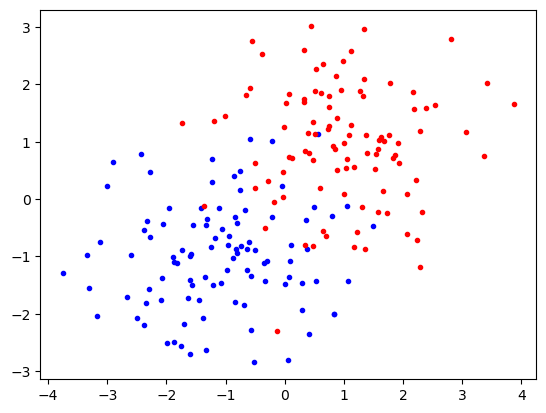

In [65]:
gaussian_blue = np.random.multivariate_normal(mean=np.array((-1,-1)),cov=np.eye(2),size=100)
gaussian_red = np.random.multivariate_normal(mean=np.array((1,1)),cov=np.eye(2),size=100)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo',marker='.',color='b')
plt.plot(gaussian_red[:,0],gaussian_red[:,1],'bo',marker='.',color='r')

In [66]:
list_of_output = np.empty(200)
for i in range(100):
    list_of_output[i] = 0
    list_of_output[i+100] = 1

In [68]:
data = np.hstack((gaussian_blue,gaussian_red))
outcome = list_of_output

In [70]:
type(gaussian_blue[0,0])

numpy.float64

In [69]:
n_samples = 200

In [72]:
def rbf(x,y,l=1):
    """Gaussian kernel of dimension 1

    Parameters
    -------------------------------
    x : float
    a real number

    y : float
    a real number

    l: float, non zero
    a scale parameter
    -------------------------------
    """
    dim = x.shape[0]
    vect = np.empty(dim)
    if type(y) != float and type(y) != int and type(y) != numpy.float64 :
        d = np.exp(-((np.linalg.norm(x-y))**2)/(2*(l**2)))
        return d
    else :
        for i in range(dim):
            vect[i] = np.exp(-((np.linalg.norm(x[i] - y))**2)/(2*(l**2)))
        return vect

In [75]:
omega = np.empty((n_samples,n_samples))
for k in range(n_samples):
    for i in range(n_samples):
        omega[k,i] = outcome[k]*outcome[i]*rbf_dim_1(x=data[k],y=data[i],l=1)

ValueError: setting an array element with a sequence.

In [28]:
first_row = np.hstack((0,-np.transpose(outcome)))

In [35]:
first_row = first_row.reshape(1,first_row.shape[0])

In [39]:
bot_of_mat_right = omega + (1/gamma)*np.eye(n_samples)

In [41]:
bot_of_mat = np.hstack((outcome.reshape(n_samples,1), bot_of_mat_right))

In [42]:
whole_mat = np.vstack((first_row, bot_of_mat))

In [44]:
right_hand = np.ones(n_samples+1)
right_hand[0] = 0

In [46]:
coeffs = np.linalg.solve(a=whole_mat,b=right_hand)

In [47]:
coeffs.shape

(201,)

In [48]:
b = coeffs[0]
alpha = coeffs[1:201]

In [50]:
test_data = np.linspace(start=-2,stop=3,num=200)

In [51]:
results = np.empty(200)

In [52]:
for i in range(200):
    results[i] = np.sum(alpha*outcome*rbf_dim_1(x=data[i],y=data,l=1))

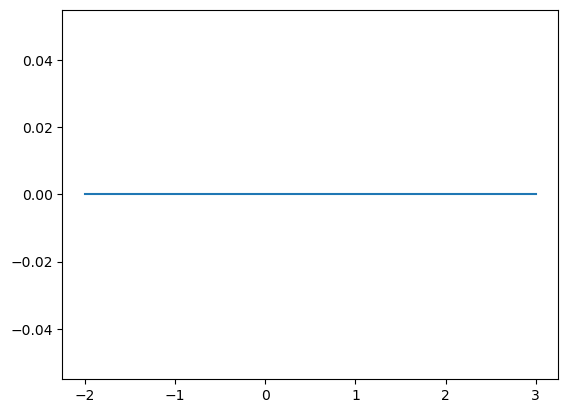

In [53]:
plt.plot(test_data,results)

In [60]:
alpha

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0